In [1]:
#prepare a single file that has all the scores



/mnt/lab_data2/avanti/interpret-benchmark/lab_meeting_sep182020


In [42]:
import vakai
from vakai import util
from vakai.motifhit import motifhit_from_str
import numpy as np


def read_sequences_and_motifs_file(sequences_and_motifs_file):
    seqids = []
    onehot_sequences = []
    motifs_in_seqs = []
    fh = util.open_fh(sequences_and_motifs_file)
    for line in fh:
        seqid, sequence, motifstrings = line.decode("utf-8").rstrip().split("\t") 
        seqids.append(seqid)
        onehot_sequences.append(util.one_hot_encode(sequence))
        motifs = [motifhit_from_str(motifstring=motifstring,seqid=seqid)
                  for motifstring in motifstrings.split(",")]
        #do a sanity check for each motif
        for motif in motifs:
            assert sequence[motif.start:motif.end]==motif.matchedseq 
        motifs_in_seqs.append(motifs)
    fh.close()
    onehot_sequences = np.squeeze(np.array(onehot_sequences))
    return seqids, onehot_sequences, motifs_in_seqs  


CELL_LINE = "A549"

SEQIDS, ONEHOT_SEQUENCES, MOTIFS_IN_SEQS = read_sequences_and_motifs_file(
    sequences_and_motifs_file=("/users/eprakash/git/interpret-benchmark/"
                               +"data/dnase_positives/common_scripts/"
                               +CELL_LINE+"/sequences/top_10k_sim_positives.txt.gz"))

In [67]:
import h5py
#f = h5py.File("/users/eprakash/git/interpret-benchmark/scripts/basset/A549/sim_pos_and_neg.h5", "r")
f = h5py.File("/users/eprakash/git/interpret-benchmark/scripts/deepsea_beluga/A549/sim_pos_and_neg.h5", "r")

In [68]:
def read_gkmexplain_scores(file):
    impscores = [
        np.array( [sum([float(z) for z in y.split(",")])
                    for y in x.rstrip().split("\t")[2].split(";")])
        for x in open(file) ]
    return np.array(impscores)

gkmexplain_scores = read_gkmexplain_scores(
    file="/users/eprakash/git/interpret-benchmark/scripts/gkmexplain/"
         +CELL_LINE+"/top_10k_sim_positives.gkmexplain.txt")

deeplift


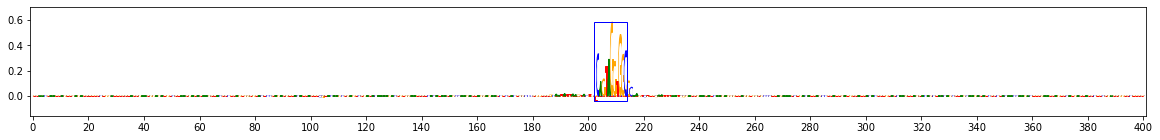

ism


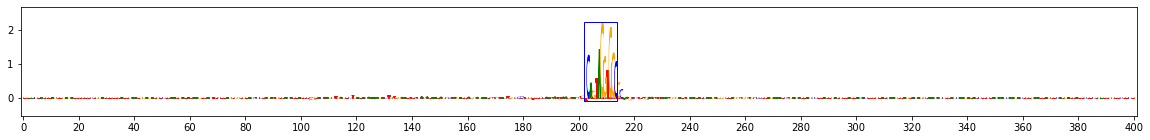

gradtimesinp


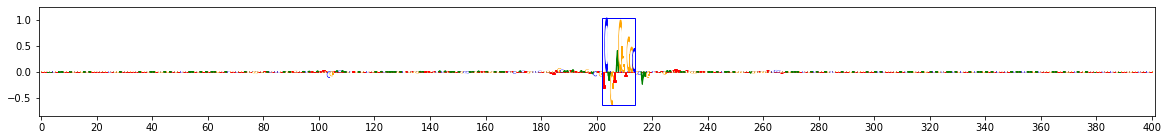

ig


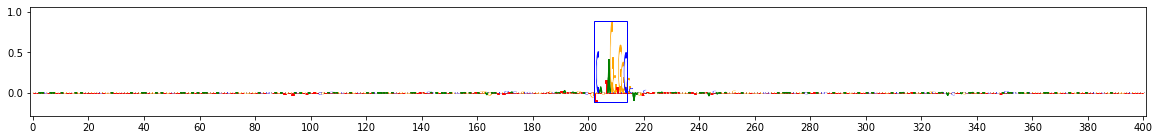

gkmexplain


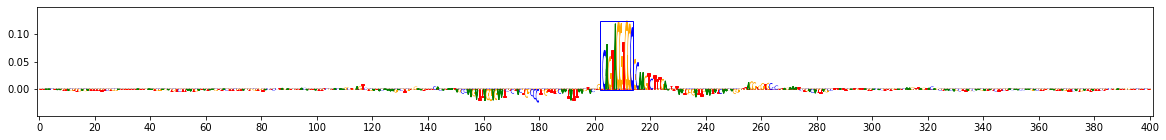

In [70]:
from modisco.visualization import viz_sequence

def visualize_sequence(scores, index):
    viz_sequence.plot_weights(
        ONEHOT_SEQUENCES[index]*np.array(scores[index])[:,None],
        subticks_frequency=20,
        highlight={"blue": [(x.start, x.end) for x in MOTIFS_IN_SEQS[index]]} )

#INDEX=100
#INDEX = 1000
print("deeplift")
visualize_sequence(scores=f['deeplift-rs_ref:shuff-20'], index=INDEX)
print("ism")
visualize_sequence(scores=f['ism'], index=INDEX)
print("gradtimesinp")
visualize_sequence(scores=f['gradtimesinp_ref:allzeros'], index=INDEX)
print("ig")
visualize_sequence(scores=f['ig-20_ref:shuff-20'], index=INDEX)
print("gkmexplain")
visualize_sequence(scores=gkmexplain_scores, index=INDEX)

In [36]:
gkmexplain_scores.shape

(10000, 400)

In [40]:
motifs_in_seqs[0]

[MotifHit(motifid='7-AGGGGGCGCTGT', seqid='chr12:49043810-49044210', start=154, end=166, onposstrand=False, score=16.0704, pval=1.28e-06, qval=0.332, matchedseq='ACGGCGCCCTCT'),
 MotifHit(motifid='1-CCACTAGRKGGC', seqid='chr12:49043810-49044210', start=159, end=171, onposstrand=False, score=14.0917, pval=6.9e-06, qval=0.159, matchedseq='GCCCTCTGCAGG')]